In [44]:
import tensorflow as tf

print(len(tf.config.list_physical_devices('GPU'))>0)

True


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cv2
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
%matplotlib inline

In [46]:
mat = scipy.io.loadmat('C:/Users/rsk13/Desktop/Code/Projects/DL Projects/House Street/DO NOT UPLOAD/Cropped/train_32x32.mat')

In [47]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
          [ 30,  76,  54, ...,  78, 188, 217],
          [ 38,  59, 110, ..., 101, 191, 212]],
 
         [[ 15,  86,  20, ...,  94, 205, 221],
          [ 23,  73,  52, ...,  82, 203, 222],
          [ 19,  66, 111, ..., 105, 206, 217]],
 
         [[ 15,  77,  25, ..., 114, 220, 226],
          [ 17,  78,  57, ..., 101, 218, 227],
          [ 19,  56, 116, ..., 125, 220, 221]],
 
         ...,
 
         [[ 72,  90,  65, ..., 200, 229, 200],
          [ 65,  78, 144, ..., 201, 231, 199],
          [ 56,  69, 223, ..., 203, 224, 191]],
 
         [[ 82,  88,  78, ..., 192, 229, 193],
          [ 77,  77, 148, ..., 193, 229, 188],
          [ 57,  67, 218, ..., 195, 224, 182]],
 
         [[ 89,  88,  98, ..., 190, 229, 197],
          [ 79,  78, 158, ..., 191, 228, 189],
          [ 59,  66, 220, 

In [48]:
mat['X'].shape

(32, 32, 3, 73257)

In [49]:
mat['y'].shape

(73257, 1)

In [50]:
mat['y'][73256]

array([9], dtype=uint8)

In [51]:
Xtrain = mat['X']
ytrain = mat['y']

print(Xtrain.shape, ytrain.shape)

(32, 32, 3, 73257) (73257, 1)


In [52]:
type(Xtrain)

numpy.ndarray

In [53]:
Xtrain[0]

array([[[ 33,  84,  19, ...,  92, 190, 216],
        [ 30,  76,  54, ...,  78, 188, 217],
        [ 38,  59, 110, ..., 101, 191, 212]],

       [[ 15,  86,  20, ...,  94, 205, 221],
        [ 23,  73,  52, ...,  82, 203, 222],
        [ 19,  66, 111, ..., 105, 206, 217]],

       [[ 15,  77,  25, ..., 114, 220, 226],
        [ 17,  78,  57, ..., 101, 218, 227],
        [ 19,  56, 116, ..., 125, 220, 221]],

       ...,

       [[ 72,  90,  65, ..., 200, 229, 200],
        [ 65,  78, 144, ..., 201, 231, 199],
        [ 56,  69, 223, ..., 203, 224, 191]],

       [[ 82,  88,  78, ..., 192, 229, 193],
        [ 77,  77, 148, ..., 193, 229, 188],
        [ 57,  67, 218, ..., 195, 224, 182]],

       [[ 89,  88,  98, ..., 190, 229, 197],
        [ 79,  78, 158, ..., 191, 228, 189],
        [ 59,  66, 220, ..., 193, 223, 186]]], dtype=uint8)

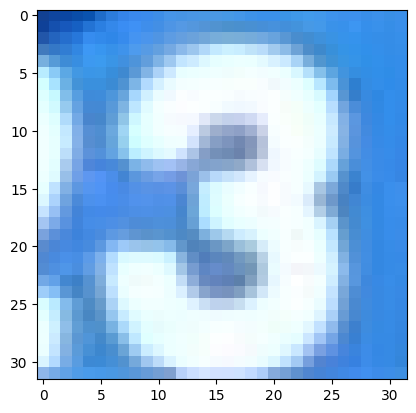

In [54]:
# Xtrain.shape = (32, 32, 3, 73257)
plt.imshow(Xtrain[:,:,:,3])

In [55]:
ytrain[3]

array([3], dtype=uint8)

### 0 has label 10

In [56]:
indices_of_10 = np.where(ytrain == 10)[0]
print(indices_of_10)

[   52    84    93 ... 73193 73220 73239]


In [57]:
ytrain[52] # In reality this number is 0

array([10], dtype=uint8)

In [58]:
ytrain = np.where(ytrain==10,0,ytrain)

In [59]:
# checking again if there are any labels with value 10

indices_of_10 = np.where(ytrain == 10)[0]
print(indices_of_10)

[]


### Randomly displaying 10 images

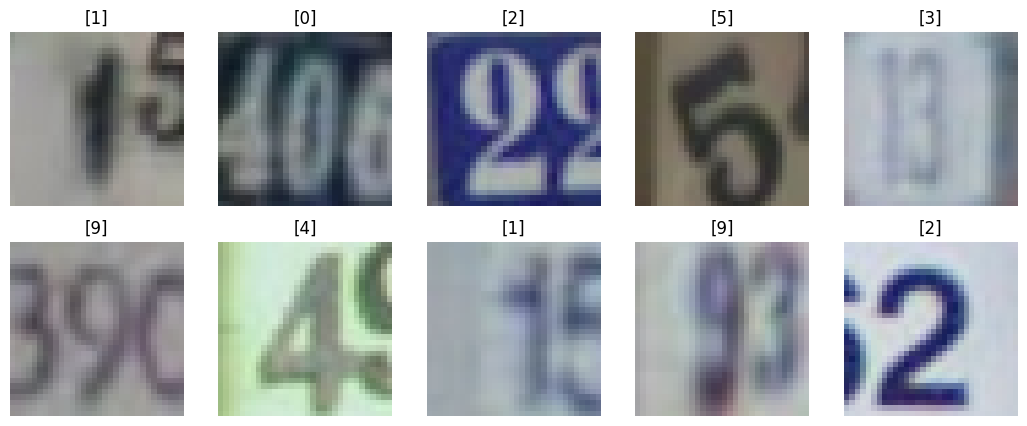

In [60]:
fig = plt.figure(figsize=(13, 5))
columns = 5
rows = 2

# ax enables access to manipulate each of subplots
ax = []

for i in range(rows * columns):
    j = np.random.randint(Xtrain.shape[3], size=1)[0]
    img = Xtrain[:, :, :, j]
    # create subplot and append to ax    
    ax.append(fig.add_subplot(rows, columns, i + 1))
    ax[-1].set_title(str(ytrain[j]))  # set title
    plt.tick_params(length=0)
    plt.axis('off')
    plt.imshow(img)

### Test images in mat file

In [61]:
test_mat = scipy.io.loadmat('C:/Users/rsk13/Desktop/Code/Projects/DL Projects/House Street/DO NOT UPLOAD/Cropped/test_32x32.mat')

In [62]:
Xtest = test_mat['X']
ytest = test_mat['y']

In [63]:
indices_of_10 = np.where(ytest == 10)[0]
print(indices_of_10)

[    3    21    34 ... 26006 26011 26021]


In [64]:
ytest[3]

array([10], dtype=uint8)

In [65]:
ytest = np.where(ytest==10,0,ytest)
indices_of_10 = np.where(ytest == 10)[0]
print(indices_of_10)

[]


### Randomly displaying 10 images

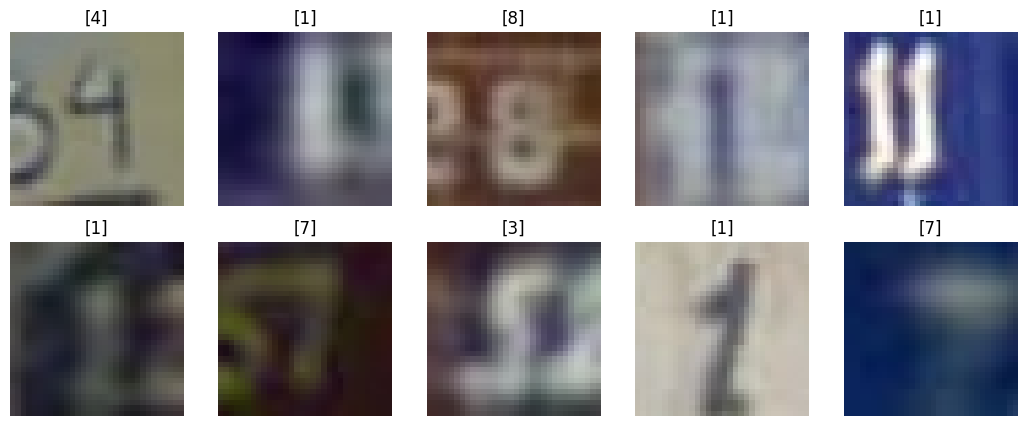

In [66]:
fig = plt.figure(figsize=(13, 5))
columns = 5
rows = 2

# ax enables access to manipulate each of subplots
ax = []

for i in range(rows * columns):
    j = np.random.randint(Xtest.shape[3], size=1)[0]
    img = Xtest[:, :, :, j]
    # create subplot and append to ax    
    ax.append(fig.add_subplot(rows, columns, i + 1))
    ax[-1].set_title(str(ytest[j]))  # set title
    plt.tick_params(length=0)
    plt.axis('off')
    plt.imshow(img)

In [67]:
print('Xtrain = {}, ytrain = {}'.format(Xtrain.shape,ytrain.shape))
print('Xtest = {}, ytest = {}'.format(Xtest.shape,ytest.shape))

Xtrain = (32, 32, 3, 73257), ytrain = (73257, 1)
Xtest = (32, 32, 3, 26032), ytest = (26032, 1)


### Normalization

In [68]:
Xtrain= Xtrain/255
Xtest = Xtest/255

## VGG-16 architecture

In [26]:
Xtrain.shape

(32, 32, 3, 73257)

In [27]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [28]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [29]:
# Freezing the pre-trained base

base_model.trainable = False

In [30]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [31]:
vgg_model = Sequential()

vgg_model.add(base_model)
vgg_model.add(Flatten())

vgg_model.add(Dense(256,activation='relu',kernel_regularizer='l2',kernel_initializer='he_uniform'))
vgg_model.add(Dropout(0.3))
vgg_model.add(BatchNormalization())

vgg_model.add(Dense(128,activation='relu',kernel_regularizer='l2',kernel_initializer='he_uniform'))
vgg_model.add(Dropout(0.3))
vgg_model.add(BatchNormalization())

vgg_model.add(Dense(32,activation='relu',kernel_regularizer='l2',kernel_initializer='he_uniform'))
vgg_model.add(Dropout(0.3))
vgg_model.add(BatchNormalization())

vgg_model.add(Dense(10,activation='softmax'))

In [32]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

In [35]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((32, 32, 3, 73257), (32, 32, 3, 26032), (73257, 1), (26032, 1))

In [36]:
vgg_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,)

vgg_mc = ModelCheckpoint(
    filepath='vgg16_best_model.h5',
    save_weights_only=True,
    save_best_only=True,   
    monitor='val_accuracy',    
    verbose=1               
)

In [38]:
vgg_history = vgg_model.fit(np.moveaxis(Xtrain[:,:,:,:30000],-1,0),ytrain[:30000],
                    validation_data=(np.moveaxis(Xtest[:,:,:,:30000],-1,0),ytest[:30000]),
                    validation_split=0.3,epochs=30,batch_size=32,callbacks=[early_stopping,vgg_mc])

Epoch 1/30
938/938 [==============================] - ETA: 0s - loss: 4.0529 - accuracy: 0.3021
Epoch 1: val_accuracy improved from -inf to 0.40865, saving model to vgg16_best_model.h5
938/938 [==============================] - 20s 17ms/step - loss: 4.0529 - accuracy: 0.3021 - val_loss: 2.2446 - val_accuracy: 0.4087
Epoch 2/30
934/938 [============================>.] - ETA: 0s - loss: 2.1512 - accuracy: 0.3555
Epoch 2: val_accuracy did not improve from 0.40865
938/938 [==============================] - 12s 13ms/step - loss: 2.1511 - accuracy: 0.3555 - val_loss: 1.9659 - val_accuracy: 0.3706
Epoch 3/30
936/938 [============================>.] - ETA: 0s - loss: 1.9992 - accuracy: 0.3509
Epoch 3: val_accuracy did not improve from 0.40865
938/938 [==============================] - 12s 13ms/step - loss: 1.9993 - accuracy: 0.3508 - val_loss: 1.8432 - val_accuracy: 0.3853
Epoch 4/30
932/938 [============================>.] - ETA: 0s - loss: 1.9441 - accuracy: 0.3549
Epoch 4: val_accuracy impr

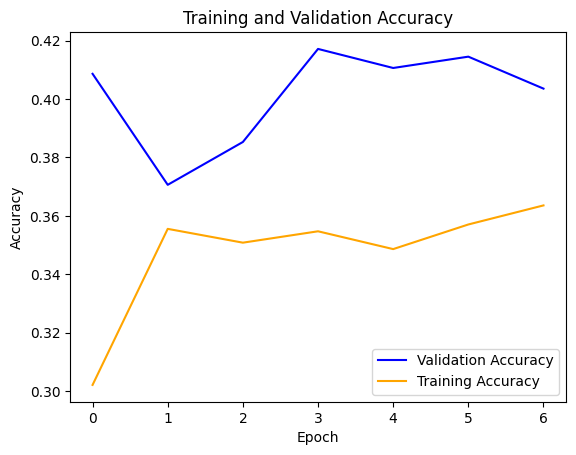

In [39]:
plt.plot(vgg_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.plot(vgg_history.history['accuracy'], color='orange', label='Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.legend()

plt.show()

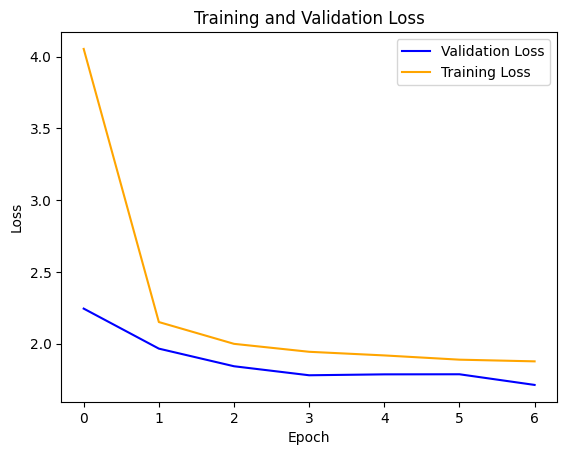

In [40]:
plt.plot(vgg_history.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(vgg_history.history['loss'], color='orange', label='Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.legend()

plt.show()